# Import danych i pakietów

In [345]:
import pandas as pd 
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

In [346]:
df = pd.read_csv('/Users/paulinarejda/Desktop/SGH/praca_II/application_record.csv')
df2 = pd.read_csv('/Users/paulinarejda/Desktop/SGH/praca_II/credit_record.csv')

In [347]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [349]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


#  Przetwarzanie danych. Analiza eksploracyjna

In [350]:
# pozbywamy się wielkich liter z nazw kolumn
df.columns = map(str.lower, df.columns)
df2.columns = map(str.lower, df2.columns)

In [351]:
# przypisanie binarnym zmiennym wartości 0-1
df.code_gender.replace({'M': 0, 'F': 1}, inplace=True)
df.flag_own_car.replace({'N': 0, 'Y': 1}, inplace=True)
df.flag_own_realty.replace({'N': 0, 'Y': 1}, inplace=True)

In [352]:
#odetek kobiet i mężczyzn w zbiorze
gender = df.code_gender.value_counts(normalize = True)
gender

1    0.671384
0    0.328616
Name: code_gender, dtype: float64

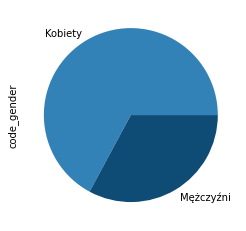

In [353]:
# wykres kołowy dla zmiennej płeć
gender.plot.pie(colors=['#3282b8', '#0f4c75'], labels=['Kobiety','Mężczyźni'])
plt.show()

In [354]:
# rodzaj miejsca zamieszkania
housing_count = dfg.groupby(['code_gender','name_housing_type']).agg({'id': 'count'})

housing_proc = housing_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
housing_proc


id
code_gender name_housing_type             
0           Co-op apartment       0.560877
            House / apartment    86.616619
            Municipal apartment   2.718095
            Office apartment      1.190784
            Rented apartment      2.390198
            With parents          6.523427
1           Co-op apartment       0.335388
            House / apartment    90.558840
            Municipal apartment   3.311952
            Office apartment      0.482120
            Rented apartment      1.178049
            With parents          4.133652

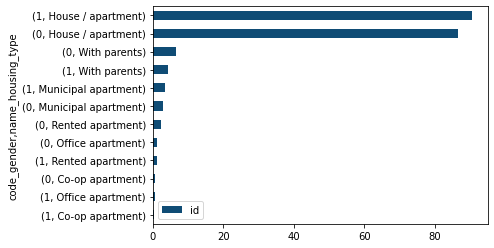

In [355]:
# wykres - rodzaj miejsca zamieszkania w podziale na płeć
housing_proc.sort_values(by = 'id').plot.barh(color='#0f4c75')
plt.show()

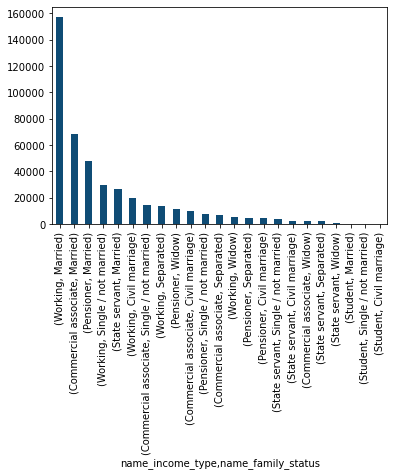

In [356]:
# STATUS ZAWODOWY & STAN CYWILNY
df[['name_income_type', 'name_family_status']].value_counts().plot(kind='bar', color='#0f4c75')

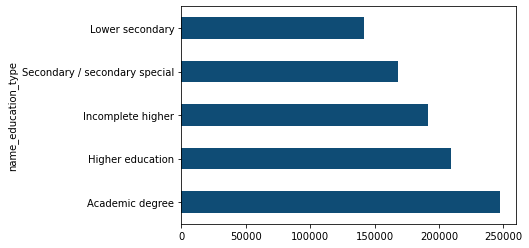

In [357]:
# wykres spłupkowy obrazujący zależność między wykształceniem i dochodami
dfg.groupby(["name_education_type"]).amt_income_total.mean().sort_values(ascending=False).plot.barh(color='#0f4c75')
plt.show()

In [358]:
# odsetek kategorii flag_own_car
a = df.flag_own_car.value_counts(normalize=True)
b = df.flag_own_realty.value_counts(normalize=True)
c = df.flag_mobil.value_counts(normalize=True)
d = df.flag_work_phone.value_counts(normalize=True)
e = df.flag_phone.value_counts(normalize=True)
f = df.flag_email.value_counts(normalize=True)

pd.DataFrame([a,b,c,d,e,f])

,0,1
flag_own_car,0.628103,0.371897
flag_own_realty,0.306649,0.693351
flag_mobil,NaN,1.000000
flag_work_phone,0.793867,0.206133
flag_phone,0.712229,0.287771
flag_email,0.891793,0.108207


In [359]:
# usuwamy zmienną, bo dla wszystkich obserwacji przyjmuje taką samą wartość 
del df['flag_mobil']

In [360]:
# sprawdzamy liczebności kategorii STATUS
df2.status.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: status, dtype: int64

In [361]:
#0: 1-29 days past due 
#1: 30-59 days past due 
#2: 60-89 days overdue 
#3: 90-119 days overdue 
#4: 120-149 days overdue 
#5: Overdue or bad debts, write-offs for more than 150 days 
#C: paid off that month 
#X: No loan for the month

In [362]:
# zmiana wartości
    # 0, C, X -> 0
    # 1-5 -> 1
df2.status.replace({'C': 0, 'X' : 0}, inplace=True)
df2.status = df2.status.astype('int')
df2.status = df2.status.apply(lambda x:1 if x >= 2 else 0)

In [363]:
# days_birth i days_employed to liczba dni od narodzin/daty rozpoczęcia pracy
 # zmieniamy znak w days_birth i dzielimy przez 365

# tworzymy zmienną age (wiek w latach)
df['age'] = (-df['days_birth'] / 365.25).round()
df = df.drop('days_birth', axis=1)

In [364]:
# staż pracy w latach
df['years_employed'] = (-df['days_employed'] / 365.25).round()
df = df.drop('days_employed', axis=1)

In [365]:
# zmiana wartości months_balance na dodatnie (0 = min)
df2.months_balance = -df2.months_balance

In [366]:
# zmiana typu zmiennych na int
df[['amt_income_total', 'cnt_fam_members', 'age', 'years_employed']] = df[['amt_income_total', 'cnt_fam_members', 
                                                                        'age', 'years_employed']].astype('int64')

In [367]:
# sprawdzamy występowanie braków
df.isnull().any()

id                     False
code_gender            False
flag_own_car           False
flag_own_realty        False
cnt_children           False
amt_income_total       False
name_income_type       False
name_education_type    False
name_family_status     False
name_housing_type      False
flag_work_phone        False
flag_phone             False
flag_email             False
occupation_type         True
cnt_fam_members        False
age                    False
years_employed         False
dtype: bool

In [368]:
df2.isnull().any()

id                False
months_balance    False
status            False
dtype: bool

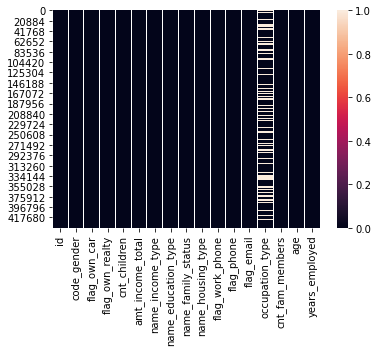

In [369]:
# wizualizacja braków
    # df
sns.heatmap(df.isnull())

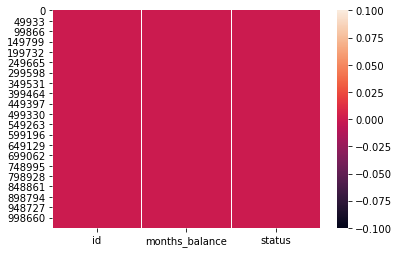

In [370]:
    # df2
sns.heatmap(df2.isnull())

In [371]:
# usuwamy zmienną occupation_type ze względu na dużą liczbę braków
df.drop('occupation_type', axis=1, inplace=True) 

In [372]:
# sprawdzamy, czy występują duplikaty w ramach zmiennej ID i, jeśli tak, usuwamy je
df['id'].duplicated().any()

True

In [373]:
# usuwamy duplikaty
df = df.drop_duplicates('id', keep='last') 

In [374]:
# dodajemy zmienną określającą, jak długo klient jest klientem banku
months_client = pd.DataFrame(df2.groupby('id').agg({'months_balance' : max}))
months_client.rename(columns = {'months_balance':'months_client'},inplace = True)
months_client.head()


,months_client
id,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59


In [375]:
# dołączanie months_client do df2
months_client = months_client.groupby('id').agg(max).reset_index()

df2 = df2.join(months_client.set_index('id'), on='id', how='inner')

df2.drop(['months_balance'], axis=1, inplace=True)
df2.head()

,id,status,months_client
0,5001711,0,3
1,5001711,0,3
2,5001711,0,3
3,5001711,0,3
4,5001712,0,18


In [376]:
# łączenie wszystkich tabel
df2 = df2.groupby('id').agg(max).reset_index()

df = df.join(df2.set_index('id'), on='id', how='inner')

df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_work_phone,flag_phone,flag_email,cnt_fam_members,age,years_employed,status,months_client
0,5008804,0,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,0,0,2,33,12,0,15
1,5008805,0,1,1,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,0,0,2,33,12,0,14
2,5008806,0,1,1,0,112500,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2,59,3,0,29
3,5008808,1,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1,52,8,0,4
4,5008809,1,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1,52,8,0,26


In [377]:
# usunięcie obserwacji odstających - Z-score
    # df
z_scores = stats.zscore(df[['cnt_children', 'amt_income_total', 'cnt_fam_members', 
                            'age', 'years_employed', 'months_client']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [378]:
# info o danych
df.info()
    # mamy 4 zmienne tekstowe, 14 liczbowych, 35.493 wiersze

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35442 entries, 0 to 434812
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   35442 non-null  int64 
 1   code_gender          35442 non-null  int64 
 2   flag_own_car         35442 non-null  int64 
 3   flag_own_realty      35442 non-null  int64 
 4   cnt_children         35442 non-null  int64 
 5   amt_income_total     35442 non-null  int64 
 6   name_income_type     35442 non-null  object
 7   name_education_type  35442 non-null  object
 8   name_family_status   35442 non-null  object
 9   name_housing_type    35442 non-null  object
 10  flag_work_phone      35442 non-null  int64 
 11  flag_phone           35442 non-null  int64 
 12  flag_email           35442 non-null  int64 
 13  cnt_fam_members      35442 non-null  int64 
 14  age                  35442 non-null  int64 
 15  years_employed       35442 non-null  int64 
 16  sta

# Analiza eksploracyjna v.2

In [379]:
# tworzymy kopię zbioru do wizualizacji
dfg = df 

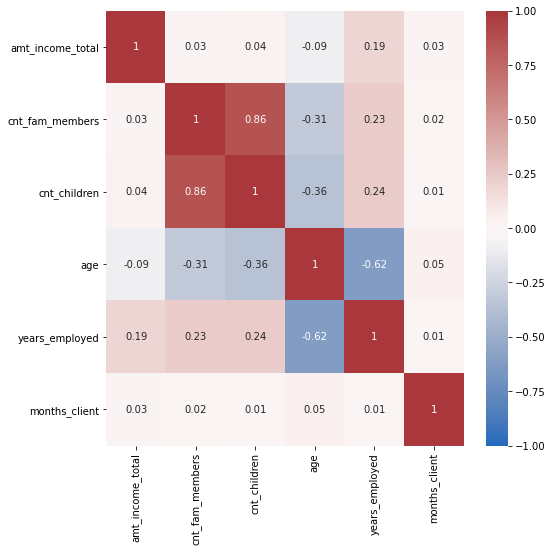

In [380]:
# korelacje - zmienne ilościowe
il = dfg[['amt_income_total', 'cnt_fam_members', 'cnt_children', 'age', 'years_employed', 'months_client']]
plt.figure(figsize = (8,8))
sns.heatmap(il.corr().round(2), cmap='vlag', vmin=-1, vmax=1, annot=True)
plt.show()

In [381]:
# wstępna inspekcja danych
df.describe()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,flag_work_phone,flag_phone,flag_email,cnt_fam_members,age,years_employed,status,months_client
count,3.544200e+04,35442.000000,35442.000000,35442.000000,35442.000000,35442.000000,35442.000000,35442.000000,35442.000000,35442.000000,35442.000000,35442.000000,35442.000000,35442.000000
mean,5.078298e+06,0.673015,0.374584,0.669375,0.387873,179865.375346,0.225382,0.293578,0.088285,2.154252,43.827888,-165.762993,0.016816,26.174736
std,4.186565e+04,0.469118,0.484022,0.470445,0.646760,81535.733690,0.417840,0.455407,0.283713,0.831433,11.575523,379.972251,0.128584,16.511705
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,27000.000000,0.000000,0.000000,0.000000,1.000000,21.000000,-1000.000000,0.000000,0.000000
25%,5.042078e+06,0.000000,0.000000,0.000000,0.000000,121500.000000,0.000000,0.000000,0.000000,2.000000,34.000000,1.000000,0.000000,12.000000
50%,5.074670e+06,1.000000,0.000000,1.000000,0.000000,157500.000000,0.000000,0.000000,0.000000,2.000000,43.000000,4.000000,0.000000,24.000000
75%,5.115407e+06,1.000000,1.000000,1.000000,1.000000,225000.000000,0.000000,1.000000,0.000000,3.000000,53.000000,9.000000,0.000000,39.000000
max,5.150487e+06,1.000000,1.000000,1.000000,2.000000,472500.000000,1.000000,1.000000,1.000000,4.000000,69.000000,43.000000,1.000000,60.000000


In [382]:
# obliczamy statystyki dla zmiennych ilościowych
df[['amt_income_total', 'cnt_fam_members', 'cnt_children', 'age', 'years_employed', 'months_client']].describe().round()

,amt_income_total,cnt_fam_members,cnt_children,age,years_employed,months_client
count,35442.0,35442.0,35442.0,35442.0,35442.0,35442.0
mean,179865.0,2.0,0.0,44.0,-166.0,26.0
std,81536.0,1.0,1.0,12.0,380.0,17.0
min,27000.0,1.0,0.0,21.0,-1000.0,0.0
25%,121500.0,2.0,0.0,34.0,1.0,12.0
50%,157500.0,2.0,0.0,43.0,4.0,24.0
75%,225000.0,3.0,1.0,53.0,9.0,39.0
max,472500.0,4.0,2.0,69.0,43.0,60.0


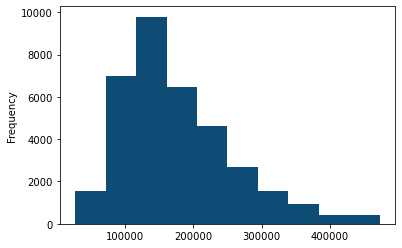

In [383]:
# histogram dla zmiennej amt_income_total
df.amt_income_total.plot.hist(color='#0f4c75')

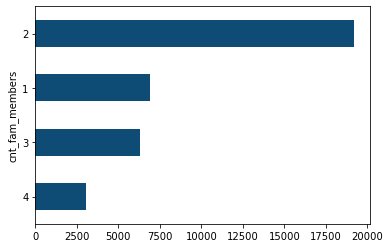

In [384]:
# wykres słupkowy dla zmiennej cnt_fam_members
dfg.groupby(['cnt_fam_members']).cnt_fam_members.count().sort_values(ascending=True).plot.barh(color='#0f4c75')
plt.show()

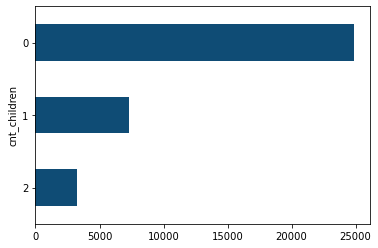

In [385]:
# wykres słupkowy dla zmiennej cnt_children
dfg.groupby(['cnt_children']).cnt_children.count().sort_values(ascending=True).plot.barh(color='#0f4c75')
plt.show()

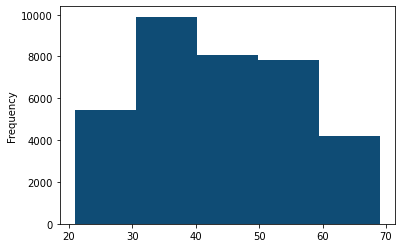

In [386]:
# histogram dla zmiennej age
df.age.plot.hist(bins=5, color='#0f4c75')

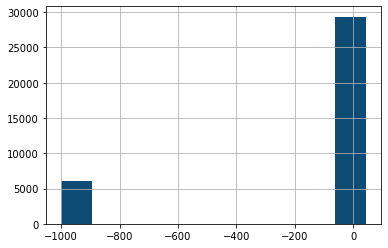

In [387]:
# przyglądamy się zmiennej years_employed
df.years_employed.hist(color='#0f4c75')

In [388]:
# sprawdzamy wartości mniejsze od 0
df.years_employed[df.years_employed<0].describe()
    # wszystkie mają wartość -1000 -> tak zostały oznaczone osoby nieposiadające pracy
    # nieposiadające pracy

count    6088.0
mean    -1000.0
std         0.0
min     -1000.0
25%     -1000.0
50%     -1000.0
75%     -1000.0
max     -1000.0
Name: years_employed, dtype: float64

In [389]:
# statystyki dla wartości > 0
df.years_employed[df.years_employed>0].describe().round()

count    28460.0
mean         7.0
std          6.0
min          1.0
25%          3.0
50%          6.0
75%         10.0
max         43.0
Name: years_employed, dtype: float64

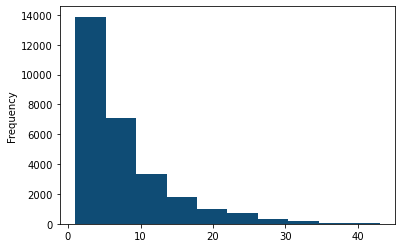

In [390]:
# histogram dla wartości > 0
df.years_employed[df.years_employed>0].plot.hist(color='#0f4c75')

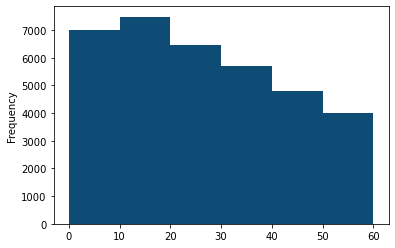

In [391]:
# histogram dla zmiennej months_client
df.months_client.plot.hist(color='#0f4c75', bins=6)

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35442 entries, 0 to 434812
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   35442 non-null  int64 
 1   code_gender          35442 non-null  int64 
 2   flag_own_car         35442 non-null  int64 
 3   flag_own_realty      35442 non-null  int64 
 4   cnt_children         35442 non-null  int64 
 5   amt_income_total     35442 non-null  int64 
 6   name_income_type     35442 non-null  object
 7   name_education_type  35442 non-null  object
 8   name_family_status   35442 non-null  object
 9   name_housing_type    35442 non-null  object
 10  flag_work_phone      35442 non-null  int64 
 11  flag_phone           35442 non-null  int64 
 12  flag_email           35442 non-null  int64 
 13  cnt_fam_members      35442 non-null  int64 
 14  age                  35442 non-null  int64 
 15  years_employed       35442 non-null  int64 
 16  sta

# WOE & IV

In [393]:
# definiujemy funkcję WOE/IV
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [394]:
iv, woe = iv_woe(data = df, target = 'status', bins=10, show_woe = True)
print(iv)
print(woe)

Information value of id is 0.058947
  Variable                    Cutoff     N  Events  % of Events  Non-Events  \
0       id  (5008803.999, 5023470.1]  3545      54     0.090604        3491   
1       id    (5023470.1, 5035866.2]  3544      52     0.087248        3492   
2       id    (5035866.2, 5048107.3]  3544      42     0.070470        3502   
3       id    (5048107.3, 5061807.4]  3544      78     0.130872        3466   
4       id    (5061807.4, 5074670.0]  3544      41     0.068792        3503   
5       id    (5074670.0, 5091766.6]  3544      43     0.072148        3501   
6       id    (5091766.6, 5106052.7]  3544      68     0.114094        3476   
7       id    (5106052.7, 5117750.2]  3544      72     0.120805        3472   
8       id    (5117750.2, 5139543.2]  3544      74     0.124161        3470   
9       id    (5139543.2, 5150487.0]  3545      72     0.120805        3473   

   % of Non-Events       WoE        IV  
0         0.100184 -0.100506  0.000963  
1         0.

In [395]:
# wyniki
#                   id  0.058947
#          code_gender  0.016585
#         flag_own_car  0.000063
#      flag_own_realty  0.028807
#         cnt_children  0.001218
#     amt_income_total  0.012885
#     name_income_type  0.018348
#  name_education_type  0.010730
#   name_family_status  0.030496
#    name_housing_type  0.016406
#      flag_work_phone  0.001850
#           flag_phone  0.000686
#           flag_email  0.000014
#      cnt_fam_members  0.009274
#                  age  0.026040
#       years_employed  0.040616
#        months_client  0.292888

    # nie bierzemy ID do modelowania
# income_type bardziej istotne niż wysokość zarobków

# medium
    # months_client - najistotniejsze (blisko progu - strong)
# weak
    # flag_own_realty
    # name_family_status
    # years_employed
    # age
# useless
    # id
    # code_gender
    # flag_own_car
    # cnt_children
    # amt_income_total 
    # name_income_type (blisko progu)
    # name_education_type
    # name_housing_type (blisko progu)
    # flag_work_phone
    # flag_phone
    # flag_email
    # cnt_fam_members
    
# nie bierzemy do modelu zmiennych o IV < 0,02
    # wyjątek stanowią zmienne name_income_type i name_housing_type,
    # ponieważ po zaokrągleniu IV wynosi 0,02


In [396]:
#Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)
#0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio
#0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio
#0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.
#0.5, suspicious relationship (Check once)

In [397]:
# usuwamy zmienne o niskiej wartości IV
df = df.drop(['id', 'code_gender', 'flag_own_car', 'cnt_children', 
              'amt_income_total', 'name_education_type', 'flag_work_phone',
              'flag_phone','flag_email', 'cnt_fam_members'], axis=1)

In [398]:
# tworzymy kopię zbioru (do regresji logistycznej)
dfd = df

# Model regresji logistycznej

### Dummy variables

In [399]:
# tworzymy dummy variables
def DummyV(df, columns):
    # Creating a dummy variable for some of the categorical variables and dropping the first one.
    dummy1 = pd.get_dummies(df[columns], drop_first=True)
    
    # Adding the results to the master dataframe
    df1 = pd.concat([df, dummy1], axis=1)
    
    #Dropping the initial column
    df1.drop(columns, axis = 1, inplace = True)
    
    return df1

In [400]:
df.columns

Index(['flag_own_realty', 'name_income_type', 'name_family_status',
       'name_housing_type', 'age', 'years_employed', 'status',
       'months_client'],
      dtype='object')

In [401]:
df = DummyV(df, ['name_income_type', 'name_family_status','name_housing_type'])

In [402]:
df.columns

Index(['flag_own_realty', 'age', 'years_employed', 'status', 'months_client',
       'name_income_type_Pensioner', 'name_income_type_State servant',
       'name_income_type_Student', 'name_income_type_Working',
       'name_family_status_Married', 'name_family_status_Separated',
       'name_family_status_Single / not married', 'name_family_status_Widow',
       'name_housing_type_House / apartment',
       'name_housing_type_Municipal apartment',
       'name_housing_type_Office apartment',
       'name_housing_type_Rented apartment', 'name_housing_type_With parents'],
      dtype='object')

In [403]:
# zmieniamy kolejność zmiennych - status w ostatniej kolumnie
df = df.reindex(['flag_own_realty', 'age', 'years_employed', 'months_client',
       'name_income_type_Pensioner', 'name_income_type_State servant',
       'name_income_type_Student', 'name_income_type_Working',
       'name_family_status_Married', 'name_family_status_Separated',
       'name_family_status_Single / not married', 'name_family_status_Widow',
       'name_housing_type_House / apartment',
       'name_housing_type_Municipal apartment',
       'name_housing_type_Office apartment',
       'name_housing_type_Rented apartment', 'name_housing_type_With parents', 'status'], 
                axis=1)

### Podział na zbiór treningowy i testowy

In [404]:
# X = wszystkie wartości bez statusu
X = df.iloc[:,1:-1] 
# y = tylko status
Y = df.iloc[:,-1] 

In [405]:
# sprawdzamy liczebność grup "dobry/zły" klient
df.status.value_counts(normalize=True)
    # grupa 0 stanowi ponad 98% obserwacji

0    0.983184
1    0.016816
Name: status, dtype: float64

In [406]:
# tworzymy podział na zbiór treningowy (70%) i testowy (30%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    stratify=Y, test_size=0.3,
                                                    random_state = 10086)

In [407]:
# SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [408]:
# normalizacja danych typu min-max
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

In [409]:
# tworzymy podział na zbiór treningowy (70%) i testowy (30%)
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced, 
                                                    stratify=y_balanced, test_size=0.3,
                                                    random_state = 10086)

### Tworzenie i ocena modelu

In [410]:
model1 = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model1.fit(X_train, y_train)
# zastosowanie modelu na zbiorze testowym
y_pred = model1.predict(X_test)

/Users/paulinarejda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [411]:
# tabela zawierająca przewidywane wartości
y_pred_1 = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['id'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,status,id,0
0,1,48375,1
1,1,31886,0
2,0,11074,0
3,0,8776,0
4,0,6302,1


In [412]:
# zmieniamy nazwę kolumny '0' na 'predicted_status'
y_pred_final= y_pred_final.rename(columns={0 : 'predicted_status'})

# zmieniamy kolejność kolumn w tabeli
y_pred_final = y_pred_final.reindex(['id', 'status', 'predicted_status'], axis=1)
y_pred_final.head()

,id,status,predicted_status
0,48375,1,1
1,31886,1,0
2,11074,0,0
3,8776,0,0
4,6302,0,1


In [413]:
# confusion matrix
CM = confusion_matrix(y_test, y_pred)

# definiujemy False Negative, False Positive etc.
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print('Accuracy Score is {:.4}'.format(accuracy_score(y_test, y_pred)))
print(CM)

Accuracy Score is 0.6256
[[4569 2749]
 [2731 4587]]


In [414]:
# obliczamy sensitivity i specificity
sensitivity = TP / (TP + FN).astype(float)
specificity = TN / (TN + FP).astype(float)

print('sensitivity =', sensitivity.round(4))
print('specificity =', specificity.round(4))

sensitivity = 0.6268
specificity = 0.6244


In [415]:
# confusion matrix
#sns.set_style('white') 
#class_names = ['0','1']
#cm = confusion_matrix(y_test,y_predict)
#plot_confusion_matrix(model1, X=y_test, y_true=y_predict,
                      #labels= class_names, normalize = True) 
                        #title='Normalized Confusion Matrix: Logistic Regression')

In [416]:
# definiujemy funkcję dla krzywej ROC
def krzywa_roc(actual, prob):
    fpr, tpr, thresholds = metrics.roc_curve(actual, prob, drop_intermediate = False)
    a_score = metrics.roc_auc_score(actual, prob)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='krzywa ROC (pole powierzchni = %0.2f)' % a_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Krzywa ROC')
    plt.legend(loc="lower right")
    plt.show()
    return None

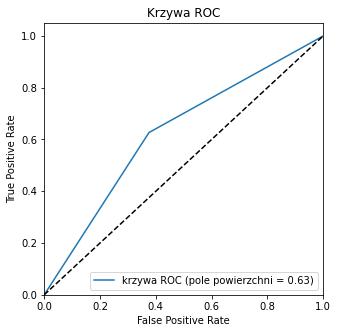

In [417]:
# krzywa ROC
krzywa_roc(y_test, y_pred)

# Drzewo decyzyjne

In [418]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

### Podział na zbiór testowy i treningowy (w tabeli bez dummy variable)

In [419]:
# X = wszystkie wartości bez statusu
X = df.iloc[:,1:-1] 
# y = tylko status
Y = df.iloc[:,-1] 

In [420]:
dfd.head()

,flag_own_realty,name_income_type,name_family_status,name_housing_type,age,years_employed,status,months_client
0,1,Working,Civil marriage,Rented apartment,33,12,0,15
1,1,Working,Civil marriage,Rented apartment,33,12,0,14
2,1,Working,Married,House / apartment,59,3,0,29
3,1,Commercial associate,Single / not married,House / apartment,52,8,0,4
4,1,Commercial associate,Single / not married,House / apartment,52,8,0,26


In [421]:
# tworzymy podział na zbiór treningowy (70%) i testowy (30%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    stratify=Y, test_size=0.3,
                                                    random_state=10086)

In [422]:
# normalizacja danych typu min-max
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

In [423]:
# SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [424]:
# tworzymy podział na zbiór treningowy (70%) i testowy (30%)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, 
                                                    stratify=y_balanced, test_size=0.3,
                                                    random_state=10086)

### Tworzenie i ocena modeli

#### Drzewo decyzyjne

In [425]:
# tworzymy drzewo decyzyjne
dec_tree = DecisionTreeClassifier(max_depth=10)

# fitting the model
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [426]:
# predykcja na zbiorze testowym
y_pred = dec_tree.predict(X_test)

In [427]:
# tabela zawierająca przewidywane wartości
y_pred_1 = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['id'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,status,id,0
0,1,48375,1
1,1,31886,1
2,0,11074,1
3,0,8776,0
4,0,6302,1


In [428]:
# zmieniamy nazwę kolumny '0' na 'predicted_status'
y_pred_final= y_pred_final.rename(columns={0 : 'predicted_status'})

# zmieniamy kolejność kolumn w tabeli
y_pred_final = y_pred_final.reindex(['id', 'status', 'predicted_status'], axis=1)
y_pred_final.head()

,id,status,predicted_status
0,48375,1,1
1,31886,1,1
2,11074,0,1
3,8776,0,0
4,6302,0,1


In [429]:
# confusion matrix
CM = confusion_matrix(y_test, y_pred)

# definiujemy False Negative, False Positive etc.
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print('Accuracy Score is {:.4}'.format(accuracy_score(y_test, y_pred)))
print(CM)

Accuracy Score is 0.7011
[[3861 3457]
 [ 918 6400]]


In [430]:
# obliczamy sensitivity i specificity
sensitivity = TP / (TP + FN).astype(float)
specificity = TN / (TN + FP).astype(float)

print('sensitivity =', sensitivity.round(4))
print('specificity =', specificity.round(4))

sensitivity = 0.8746
specificity = 0.5276


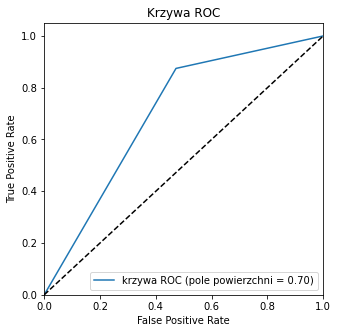

In [431]:
# Krzywa ROC
krzywa_roc(y_test, y_pred)

In [ ]:
plot.scatter(y_test,y_p)

In [432]:
# metryki do oceny modelu
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.53      0.64      7318
           1       0.65      0.87      0.75      7318

    accuracy                           0.70     14636
   macro avg       0.73      0.70      0.69     14636
weighted avg       0.73      0.70      0.69     14636



In [433]:
# obliczamy liczbę węzłów w drzewie
dec_tree.tree_.node_count

333

#### Las losowy

In [434]:
from sklearn.ensemble import RandomForestClassifier
Random_F = RandomForestClassifier(max_depth=10)
# n_estimators - domyślnie 100, liczba drzew w lesie
# max_depth - max długość drzewa
# min_samples_leaf - 
Random_F.fit(X_train, y_train)
y_pred = Random_F.predict(X_test)

In [435]:
# confusion matrix
CM = confusion_matrix(y_test, y_pred)

# definiujemy False Negative, False Positive etc.
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print('Accuracy Score is {:.4}'.format(accuracy_score(y_test, y_pred)))
print(CM)

Accuracy Score is 0.8292
[[5463 1855]
 [ 645 6673]]


In [436]:
# obliczamy sensitivity i specificity
sensitivity = TP / (TP + FN).astype(float)
specificity = TN / (TN + FP).astype(float)

print('sensitivity =', sensitivity.round(4))
print('specificity =', specificity.round(4))

sensitivity = 0.9119
specificity = 0.7465


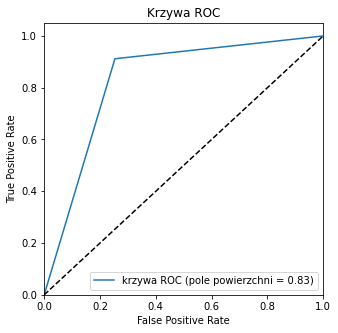

In [437]:
# Krzywa ROC
krzywa_roc(y_test, y_pred)

In [438]:
# model ze zmienionymi parametrami (parametry do zmiany)
Random_F1 = RandomForestClassifier(n_estimators=250, max_depth=12, min_samples_leaf=16)
# n_estimators - domyślnie 100, liczba drzew w lesie
# max_depth - max długość drzewa
# min_samples_leaf - 
Random_F1.fit(X_train, y_train)
y_pred = Random_F1.predict(X_test)

In [439]:
# confusion matrix
print(pd.DataFrame(confusion_matrix(y_test,y_pred)))

      0     1
0  5636  1682
1   564  6754


In [440]:
# Obliczamy accuracy
print('Accuracy = {:.4}'.format(accuracy_score(y_test, y_pred)))

Accuracy = 0.8465


In [441]:
# confusion matrix
#plot_confusion_matrix(confusion_matrix(y_test, y_pred),
                   #   labels=class_names, normalize = True, 
                   #   title='Normalized Confusion Matrix: Ramdom Forests')

NameError: name 'class_names' is not defined